# CS 418: Progress Report

## Group: Neha Anand, Sara Ali-Hasan, Risha Bongu, Whitney Le, Sebastian Sobolewski

### Project Introduction: 
This project uses data from the California Department of Managed Health Care (DMHC), which includes Independent Medical Review (IMR) decisions on overturned or upheld treatments. This dataset contains nearly 40,000 entries and 14 feature variables. Our goal for this project is to identify patterns in these decisions, especially delays in care, and understand whether certain populations are significantly affected. We plan to investigate this using several machine learning models such as Logistic Regression, Random Forest, and Naive Bayes and appropriate visualizations to predict whether a treatment will be overturned.  

### Changes since the proposal: 
There were no changes since the proposal. We tried to look for other datasets, but it was hard to find data that connected to our original dataset. We also tried to take the cost of how much insurance covered vs how much was out of pocket by the patient into consideration, but that was difficult to find and match to the current dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as st

In [2]:
healthData = pd.read_csv('healthData.csv')

In [3]:
healthData.head()

,_id,ReferenceID,ReportYear,DiagnosisCategory,DiagnosisSubCategory,TreatmentCategory,TreatmentSubCategory,Determination,Type,AgeRange,PatientGender,IMRType,DaysToReview,DaysToAdopt,Findings
0,1,MN25-43524,2025,Autism Spectrum,Autistic Disorder,Autism Related Tx,Appld Behav Analysis,Overturned Decision of Health Plan,Medical Necessity,0 to 10,Female,Standard,11.0,45,Nature of Statutory Criteria/Case Summary: A p...
1,2,MN25-43522,2025,Endocrine/Metabolic,Obesity,Pharmacy,Weight Control,Upheld Decision of Health Plan,Medical Necessity,51 to 64,Female,Standard,20.0,80,Findings: The physician reviewer found that N...
2,3,MN25-43521,2025,Skin Disorders,Psoriasis,Pharmacy,Biologics,Overturned Decision of Health Plan,Medical Necessity,65+,Male,Standard,13.0,56,Findings: The physician reviewer found that A...
3,4,MN25-43520,2025,Digestive System/ GI,Crohn's Disease,Pharmacy,Digestion/GI Rx,Overturned Decision of Health Plan,Medical Necessity,51 to 64,Female,Standard,18.0,54,Nature of Statutory Criteria/Case Summary: The...
4,5,MN25-43519,2025,CNS/ Neuromusc Dis,Other,Acute Med Svc Inpt,Early Discharge,Overturned Decision of Health Plan,Medical Necessity,41 to 50,Female,Standard,14.0,66,Findings: The physician reviewer found that N...


### Data: 
We started with checking the descriptive statistics such as the mean, median, mode, standard deviation, minimum, maximum, and quartile range. By first checking the original data set, we noticed that there were some duplicate values and some null values. After dropping the duplicate values but keeping the first occurrence, we did the mode imputation to fill in the null values. This ended up changing the descriptive statistics that we ran in the beginning, which made our dataset more accurate.

In [4]:
healthData.describe()

#initial overview before we realized there are duplicates and null values, looked at mean, median, mode

,_id,ReportYear,DaysToReview,DaysToAdopt
count,39447.000000,39447.000000,38764.000000,39447.000000
mean,19724.000000,2015.205263,16.314415,37.501559
std,11387.512371,6.067554,10.201466,21.602859
min,1.000000,2001.000000,0.000000,1.000000
25%,9862.500000,2010.000000,7.000000,24.000000
50%,19724.000000,2016.000000,18.000000,36.000000
75%,29585.500000,2020.000000,21.000000,46.000000
max,39447.000000,2025.000000,133.000000,636.000000


In [5]:
duplicate = healthData[healthData.duplicated(subset = ['ReferenceID'])]
print(duplicate)

#shows us what rows had duplicates 

         _id ReferenceID  ReportYear     DiagnosisCategory  \
171      172  MN24-43230        2024   Endocrine/Metabolic   
172      173  MN24-43230        2024   Endocrine/Metabolic   
173      174  MN24-43230        2024   Endocrine/Metabolic   
16581  16582  MN17-26789        2017      Genetic Diseases   
20077  20078  EI16-23294        2016                Cancer   
20900  20901  MN16-22472        2016  Digestive System/ GI   
22426  22427  EI15-20947        2015       Mental Disorder   
22757  22758  MN15-20615        2015        Skin Disorders   
23003  23004  EI15-20370        2015                Vision   
24228  24229  EI14-19144        2014        Not Applicable   
25643  25644  UR13-15728        2013       Mental Disorder   
26186  26187  MN13-15159        2013       Mental Disorder   
27884  27885  MN12-13451        2012                Cancer   
27921  27922  MN12-13415        2012       Autism Spectrum   
27933  27934  MN12-13404        2012                Cancer   
30244  3

In [6]:
healthData.isnull().sum()
#the null values at the beginning

_id                       0
ReferenceID               0
ReportYear                0
DiagnosisCategory         0
DiagnosisSubCategory      2
TreatmentCategory         0
TreatmentSubCategory      1
Determination             0
Type                      0
AgeRange                691
PatientGender           691
IMRType                   0
DaysToReview            683
DaysToAdopt               0
Findings                  0
dtype: int64

In [7]:
healthDataclean = healthData.drop_duplicates(subset = ['ReferenceID'], keep = 'first')
#dropped all duplicates but kept the first occurrance 

In [8]:
def age(group):
    modeAge = group['AgeRange'].mode()
    if not modeAge.empty:
        group['AgeRange'] = group['AgeRange'].fillna(modeAge[0])
    return group

def gender(group):
    modeGender = group['PatientGender'].mode()
    if not modeGender.empty:
        group['PatientGender'] = group['PatientGender'].fillna(modeGender[0])
    return group

def days(group):
    modeDays = group['DaysToReview'].mode()
    if not modeDays.empty:
        group['DaysToReview'] = group['DaysToReview'].fillna(modeDays[0])
    return group


def DSubCategory(group):
    modeSub = group['DiagnosisSubCategory'].mode()
    if not modeSub.empty:
        group['DiagnosisSubCategory'] = group['DiagnosisSubCategory'].fillna(modeSub[0])
    return group

def TSubCategory(group):
    modeTreat = group['TreatmentSubCategory'].mode()
    if not modeTreat.empty:
        group['TreatmentSubCategory'] = group['TreatmentSubCategory'].fillna(modeTreat[0])
    return group

healthDataclean = healthDataclean.groupby(['DiagnosisCategory']).apply(age).reset_index(drop=True)
healthDataclean = healthDataclean.groupby(['DiagnosisCategory', 'AgeRange']).apply(gender).reset_index(drop=True)
healthDataclean = healthDataclean.groupby(['DiagnosisCategory', 'PatientGender']).apply(days).reset_index(drop=True)
healthDataclean = healthDataclean.groupby(['DiagnosisCategory']).apply(DSubCategory).reset_index(drop=True)
healthDataclean = healthDataclean.groupby(['TreatmentCategory']).apply(TSubCategory).reset_index(drop=True)

In [9]:
healthDataclean.isnull().sum()
# did mode imputation and filled in null values, the remaining nulls aren't changed because we aren't using them 

_id                     0
ReferenceID             0
ReportYear              0
DiagnosisCategory       0
DiagnosisSubCategory    0
TreatmentCategory       0
TreatmentSubCategory    0
Determination           0
Type                    0
AgeRange                0
PatientGender           0
IMRType                 0
DaysToReview            0
DaysToAdopt             0
Findings                0
dtype: int64

### Exploratory Data Analysis

In [10]:
healthDataclean.describe()
#updated data descriptive statistics after dropping duplicates

,_id,ReportYear,DaysToReview,DaysToAdopt
count,39413.000000,39413.000000,39413.000000,39413.000000
mean,19715.995179,2015.210159,16.377946,37.487149
std,11384.366446,6.064549,10.121379,21.594478
min,1.000000,2001.000000,0.000000,1.000000
25%,9857.000000,2010.000000,7.000000,24.000000
50%,19711.000000,2016.000000,18.000000,36.000000
75%,29575.000000,2020.000000,21.000000,46.000000
max,39447.000000,2025.000000,133.000000,636.000000


In [11]:
healthDataclean.mode().iloc[0]

#mode after dropping duplicates 

_id                                                                     1
ReferenceID                                                     EI01-2846
ReportYear                                                         2016.0
DiagnosisCategory                                    Orth/Musculoskeletal
DiagnosisSubCategory                                                Other
TreatmentCategory                                                Pharmacy
TreatmentSubCategory                                                Other
Determination                          Overturned Decision of Health Plan
Type                                                    Medical Necessity
AgeRange                                                         51 to 64
PatientGender                                                      Female
IMRType                                                          Standard
DaysToReview                                                         21.0
DaysToAdopt                           

### Visualization Explanation for EDA:
Now that we have a clean dataset, we started the exploratory data analysis. For this, we created two visualizations that show the trends for age and gender depending on the determination of the health plan. Looking at the overall trends helped us come up with our hypothesis. The two visualizations that we had helped us with identifying the issue of how older adults are facing longer delays when it comes to decisions being made about their treatments. 

Text(0, 0.5, 'Count of Determination')

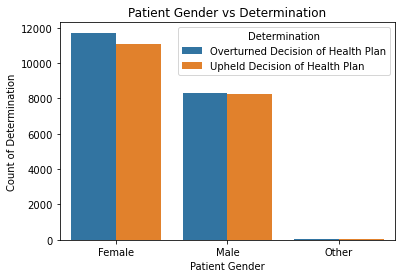

In [12]:
grouped = healthDataclean.groupby(['Determination', 'PatientGender']).size().reset_index(name='Count')


sns.barplot(data=grouped, x='PatientGender', y='Count', hue='Determination')
plt.title('Patient Gender vs Determination')
plt.xlabel('Patient Gender')
plt.ylabel('Count of Determination')

#bar plot of gender vs determination

Text(0, 0.5, 'Count of Determination')

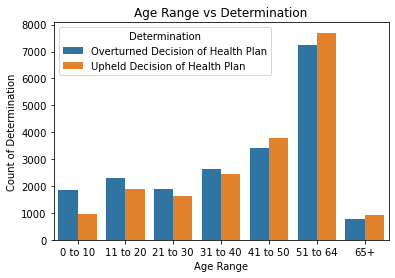

In [13]:
grouped = healthDataclean.groupby(['Determination', 'AgeRange']).size().reset_index(name='Count')


sns.barplot(data=grouped, x='AgeRange', y='Count', hue='Determination')
plt.title('Age Range vs Determination')
plt.xlabel('Age Range')
plt.ylabel('Count of Determination')

#bar plot of age vs determination

## 8 Visuals backing up the Hypothesis

### Hypothesis: Certain populations, such has older adults with a chronic diagnosis, face longer delays between review and adoption.

### Scatterplot Explanation: 
This scatterplot shows whether a certain age group faces longer delays between review(x-axis) and adoption(y-axis) processes, based on the variables "days to review" and "days to adopt", colored by the age range. Below we can see that the scatterplot has positive correlation between the age and difference in adopt vs review. This means that as the number of days taken to review increases, the number of days taken to adopt also increases. This is a direct relationship. In the scatterplot, we can also see that all of the age ranges increase, but mostly ages 51-64, which means that the older population is having the most delays. - Risha Bongu

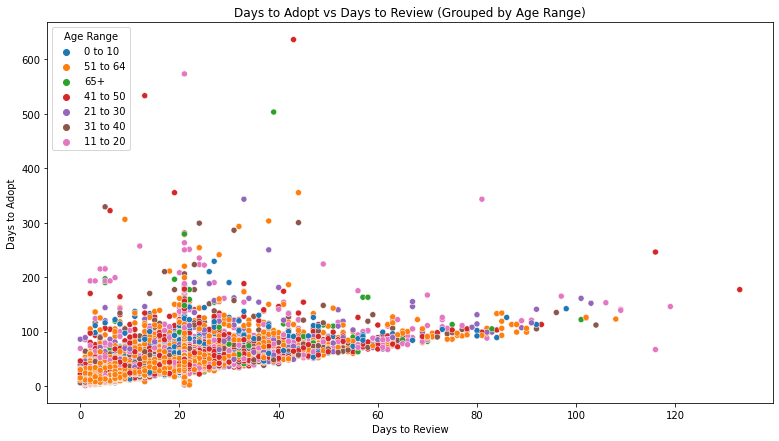

In [14]:
#scatterplot

plt.figure(figsize=(13, 7))
sns.scatterplot(data=healthDataclean, x='DaysToReview', y='DaysToAdopt', hue='AgeRange')
plt.title('Days to Adopt vs Days to Review (Grouped by Age Range)')
plt.xlabel('Days to Review')
plt.ylabel('Days to Adopt')
plt.legend(title='Age Range', loc='upper left')

### Line Chart 1 Explanation:

This line chart shows the percentage of the determinations that were overturned from 2020 - 2024 across all of the diagnosis categories. I chose to look at the span of the 4 years because it was easier to understand and read. When I tried to do all of the years, the chart was messy and I didn't understand what was happening. The x axis shows the years from 2020 to 2024, and the y axis shows the percent of the cases that were overturned. I wanted to include 2025 in this chart as well, however, since we are still in the beginning of the year the data is incomplete. The chart helps with looking at the trends with all of the diagnosis and shows the rates of overturned cases. - Neha Anand

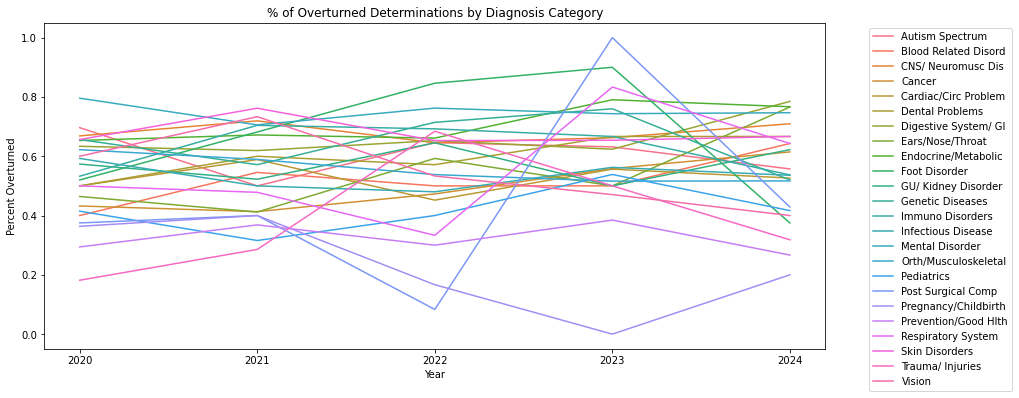

In [15]:
# Line chart - years vs overturned and diagnosis category (legend)
#     Do the same for years vs. upheld and diagnosis category 

healthDataclean['columnOverturned'] = healthDataclean['Determination'].str.contains("Overturned")

orderGroup = healthDataclean.groupby(['ReportYear', 'DiagnosisCategory'])['columnOverturned'].mean().reset_index()
year = orderGroup[(orderGroup['ReportYear'] >= 2020) & (orderGroup['ReportYear'] <= 2024)]
plt.figure(figsize=(14, 6))
sns.lineplot(data=year, x='ReportYear', y='columnOverturned', hue='DiagnosisCategory')
plt.title('% of Overturned Determinations by Diagnosis Category')
plt.ylabel('Percent Overturned')
plt.xlabel('Year')
plt.xticks(ticks=sorted(year['ReportYear'].unique()))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


### Line Chart 2 Explanation:
Going off of the previous chart, this following line chart shows the percentage of determinations that were upheld from 2020 - 2024 across all of the diagnosis categories. Like the previous chart, the x axis shows the years from 2020 to 2024 and the y axis shows the percent of cases that were upheld. This chart is a good comparison with the previous chart because we are able to see the differences in the cases that were upheld vs the cases that were overturned. - Neha Anand

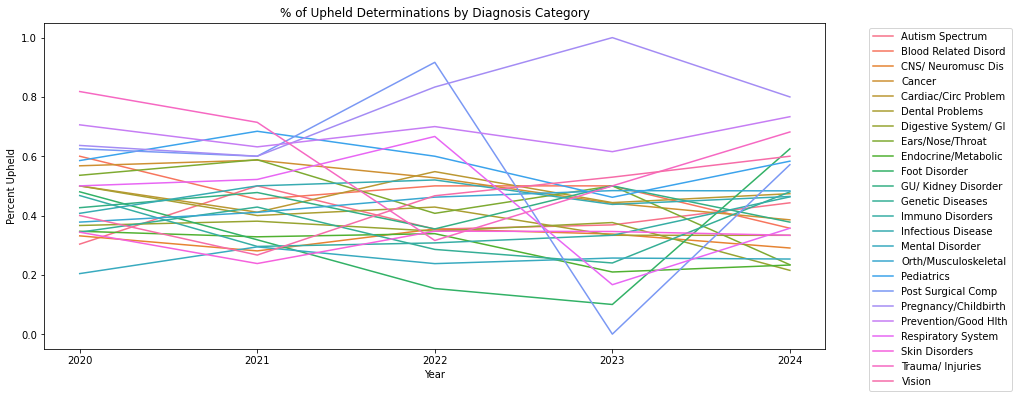

In [16]:
# Line chart - years vs overturned and diagnosis category (legend)
#     Do the same for years vs. upheld and diagnosis category 

healthDataclean['columnUpheld'] = healthDataclean['Determination'].str.contains("Upheld")

orderGroup = healthDataclean.groupby(['ReportYear', 'DiagnosisCategory'])['columnUpheld'].mean().reset_index()
year = orderGroup[(orderGroup['ReportYear'] >= 2020) & (orderGroup['ReportYear'] <= 2024)]
plt.figure(figsize=(14, 6))
sns.lineplot(data=year, x='ReportYear', y='columnUpheld', hue='DiagnosisCategory')
plt.title('% of Upheld Determinations by Diagnosis Category')
plt.ylabel('Percent Upheld')
plt.xlabel('Year')
plt.xticks(ticks=sorted(year['ReportYear'].unique()))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Box Plot Explanation:
This Box Plot shows how long it took for the health care decision to adopt depending on the age range, which is measureed by the days. Each box in this visualization correlates with an age group, this age group ranges from 0 to 65+. The line in the middles shows the median value of the number of days, the box shows where most of the data falls. The dots that are above the box are the outliers, which shows that certain decisions took longer to adopt when compared to the median value. Overall, this box plot can show that the time to adopt is similar across all of the age groups, with there being some outliers in every age group. - Neha Anand

Text(0, 0.5, 'Days to Adopt')

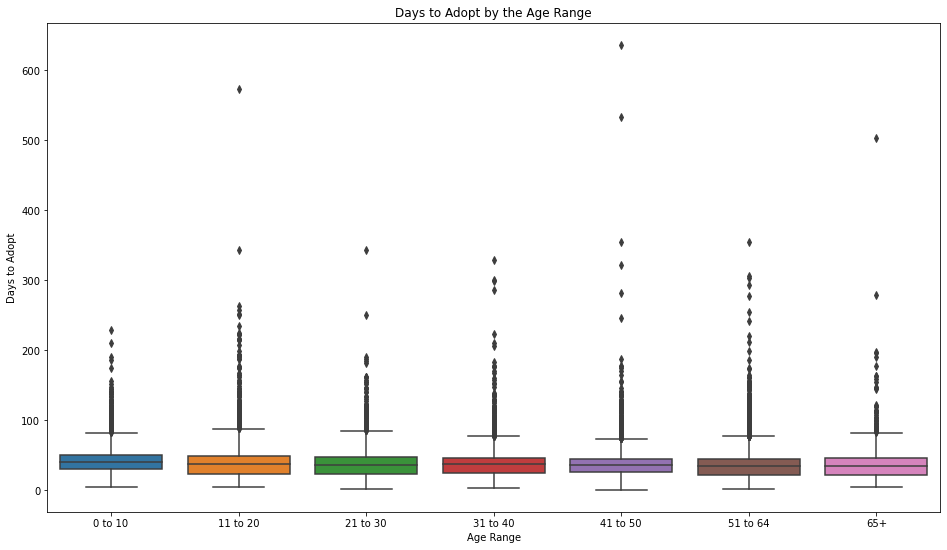

In [17]:
#boxplot - days to adopt vs age range

ageOrder = ["0 to 10", "11 to 20", "21 to 30", "31 to 40", "41 to 50", "51 to 64", "65+"]
healthDataclean['AgeRange'] = pd.Categorical(healthDataclean['AgeRange'], categories=ageOrder, ordered=True)

plt.figure(figsize=(16, 9))
sns.boxplot(data=healthDataclean, x='AgeRange', y='DaysToAdopt')
plt.title('Days to Adopt by the Age Range')
plt.xlabel('Age Range')
plt.ylabel('Days to Adopt')
#fothat r ages 0-10, the median is 50ish that point at the top is the outlier 

### Bar Plot Explanation:
This bar plot shows the top 5 frequent diagnoses categories in the dataset and the average number of days to adopt for each diagnoses. We can see that the diagnosis category mental disorder has the longest delay in this bar plot. This is really important to the hypothesis because by comparing the average days to adopt to the top 5 most common diagnoses, we can further explore whether a certain diagnosis associated with older adults is consistently associated with longer delays. - Risha Bongu

Text(0, 0.5, 'Average Days to Adopt')

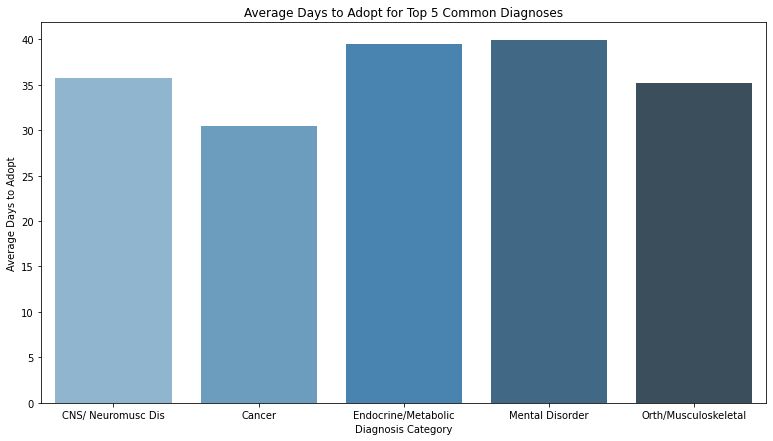

In [18]:
#Bar plot - days to adopt vs specific condition (mode diagnosis)
top5 = healthDataclean['DiagnosisCategory'].value_counts().nlargest(5).index.tolist()
topDiag = healthDataclean[healthDataclean['DiagnosisCategory'].isin(top5)]

daysToAdopt = topDiag.groupby('DiagnosisCategory')['DaysToAdopt'].mean().reset_index()

plt.figure(figsize=(13, 7))
sns.barplot(data=daysToAdopt, x='DiagnosisCategory', y='DaysToAdopt', palette='Blues_d')
plt.title('Average Days to Adopt for Top 5 Common Diagnoses')
plt.xlabel('Diagnosis Category')
plt.ylabel('Average Days to Adopt')

### Bar Plot 2 Explanation:
This bar plot shows all diagnoses categories in the dataset and shows the average days to adopt for every category. Unlike the first bar plot, this plot shows a broader adoption across all diagnoses. This is really important to the hypothesis because we can identify which specific diagnoses have the longest delays. Another thing that we can identify is that the less common diagnoses or age-related diagnoses with higher adoption can have longer delays even if they are not in the most frequent diagnosis. We can see that dental problems have the highest average days to adopt. This shows that even though this category is less common, it still shows highest and significant delays in adoption. - Risha Bongu

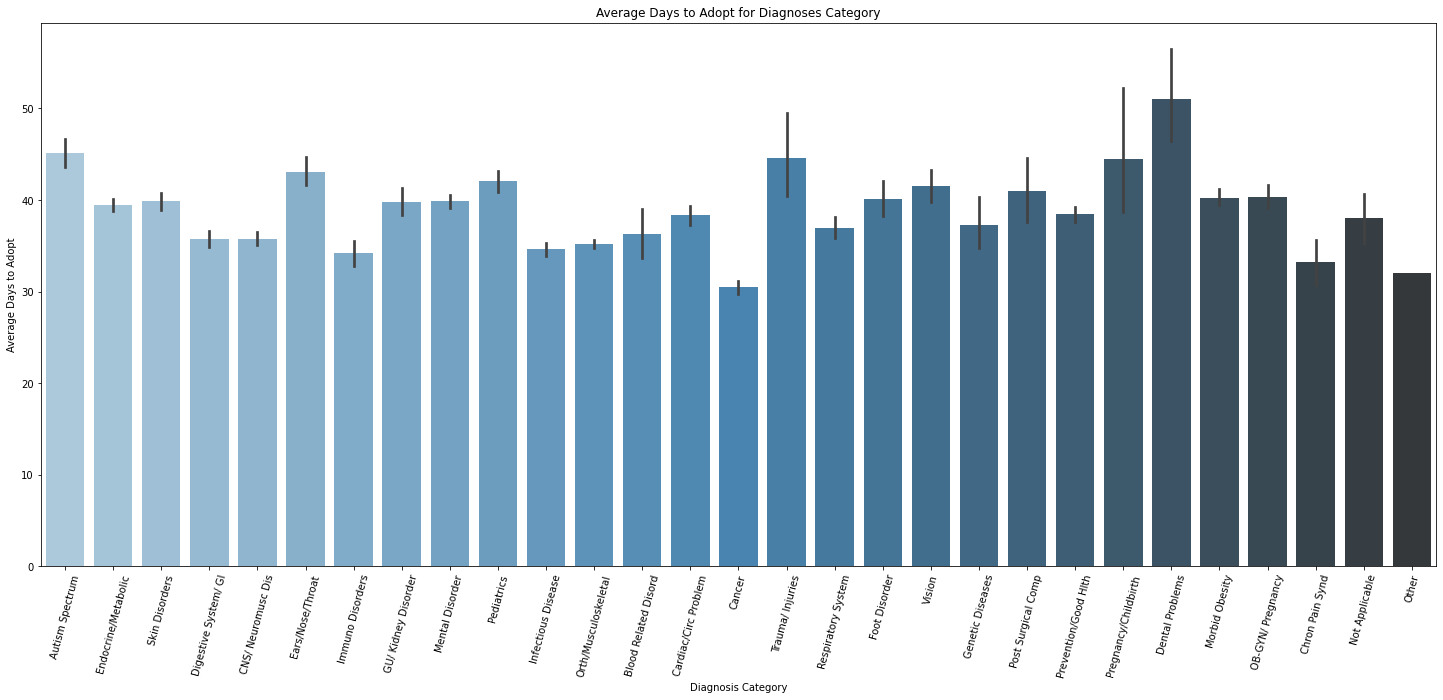

In [19]:
plt.figure(figsize=(25, 10))
sns.barplot(data=healthDataclean, x='DiagnosisCategory', y='DaysToAdopt', palette='Blues_d')
plt.title('Average Days to Adopt for Diagnoses Category')
plt.xlabel('Diagnosis Category')
plt.ylabel('Average Days to Adopt')
plt.xticks(rotation=75)
plt.show()

### Delay Histogram Explanation:
This histogram shows the distribution of total delays in healthcare decision-making. It is calculated by summing the days it took for a case to be reviewed and the days it took to adopt a healthcare decision. The x-axis represents the number of days delayed, and the y-axis shows the count of Individual Medical Records (IMR) that experienced a corresponding length of delay in reaching a final IMR decision. Based on the histogram, it is evident that most delays fall between 20 to 100 days. However, some cases take significantly longer than others, resulting in a long tail in the distribution. This tail suggests that certain demographic groups, such as older adults with chronic diagnoses, may experience longer delays in their IMR decisions. Additionally, the right-skewed distribution in the histogram highlights the presence of outliers, which could suggest that different populations may experience significant delays during the IMR review and approval process. This pattern supports our hypothesis that specific populations, such as older adults with chronic conditions, are more likely to face extended delays in the IMR process. - Sara Ali-Hasan

Text(0, 0.5, 'Count of IMRs')

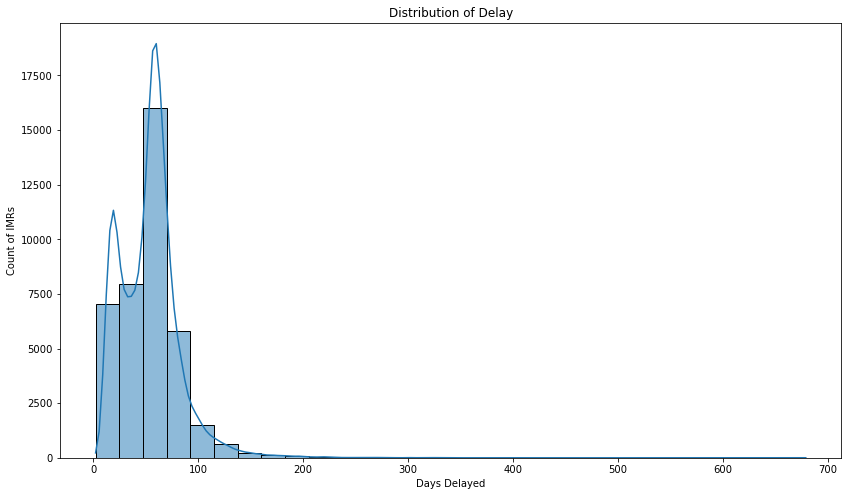

In [20]:
#histogram of delays 

healthDataclean['Delay'] = healthDataclean['DaysToAdopt'] + healthDataclean['DaysToReview']
plt.figure(figsize=(14, 8))
sns.histplot(data=healthDataclean, x='Delay', bins=30, kde=True)

plt.title('Distribution of Delay')
plt.xlabel('Days Delayed')
plt.ylabel('Count of IMRs')

### HeatMap Explanation:
This heatmap helps visualize the average delay in days for IMR decisions across various diagnosis categories and age groups. The values represent the mean delay for each diagnosis category and age range. The heatmap allows us to easily identify patterns across both features. The x-axis shows age groups, while the y-axis lists the diagnosis categories. Looking at the darker colors in the heatmap, we can see that certain age groups experience significant delays in decisions, such as the 65+ age group which experienced high average delays for dental problems. - Sara Ali-Hasan

Text(87.0, 0.5, 'Diagnosis Category')

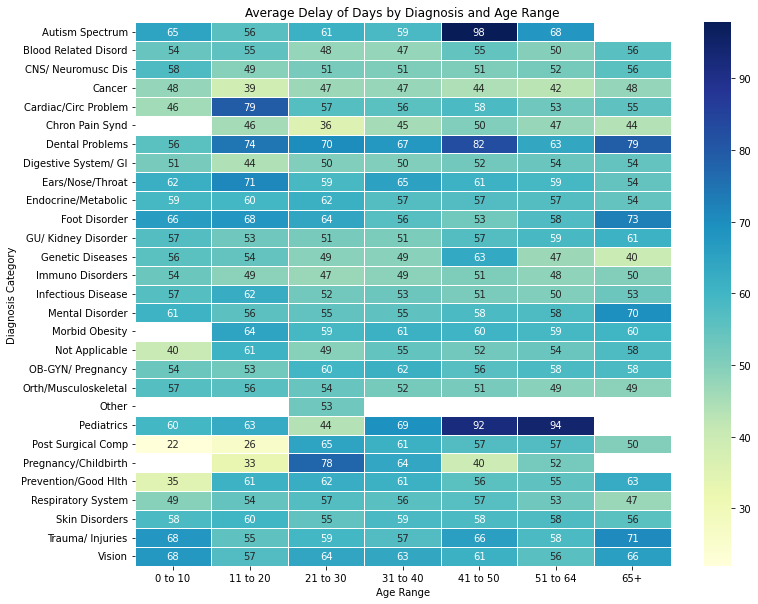

In [21]:
orderGroup = healthDataclean.groupby(['DiagnosisCategory', 'AgeRange'])['Delay'].mean().reset_index()

heatmap = orderGroup.pivot(index='DiagnosisCategory', columns='AgeRange', values='Delay')
ageOrder = ['0 to 10', '11 to 20', '21 to 30', '31 to 40', '41 to 50', '51 to 64', '65+']
heatmap = heatmap[ageOrder]

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap, annot=True, cmap='YlGnBu', linewidths=0.8)
plt.title('Average Delay of Days by Diagnosis and Age Range')
plt.xlabel('Age Range')
plt.ylabel('Diagnosis Category')

### End of Exploratory Data Analysis

### ML Analysis Explanation:

We tested with a couple different ML models with these being Random Forest (Sebastian), Logistic Regression (Sebastian), K Nearest Node (Whitney), and Naive Bayes (Whitney). The first two models performed relatively well achieving roughly 94% and 89% accuracy with other measures such as the F1 scores or Recall also being at high performance levels. However, the latter two models were not as successful in terms of accuracy with levels being around 50%. These models performing very differently comes from 2 key challenges we have begun to notice. This being that there is a class imbalance and that many of our predictors are simply not significant enough. Moving forward, we will look to introduce new methods to help enhance performance and predictability such as deeper imputations or undersampling/oversampling. (Sebastian and Whitney)

### ML Analysis -- Whitney Le

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as st
healthData = pd.read_csv('healthData.csv')

In [69]:
healthData.head()

,_id,ReferenceID,ReportYear,DiagnosisCategory,DiagnosisSubCategory,TreatmentCategory,TreatmentSubCategory,Determination,Type,AgeRange,PatientGender,IMRType,DaysToReview,DaysToAdopt,Findings
0,1,MN25-43524,2025,Autism Spectrum,Autistic Disorder,Autism Related Tx,Appld Behav Analysis,Overturned Decision of Health Plan,Medical Necessity,0 to 10,Female,Standard,11.0,45,Nature of Statutory Criteria/Case Summary: A p...
1,2,MN25-43522,2025,Endocrine/Metabolic,Obesity,Pharmacy,Weight Control,Upheld Decision of Health Plan,Medical Necessity,51 to 64,Female,Standard,20.0,80,Findings: The physician reviewer found that N...
2,3,MN25-43521,2025,Skin Disorders,Psoriasis,Pharmacy,Biologics,Overturned Decision of Health Plan,Medical Necessity,65+,Male,Standard,13.0,56,Findings: The physician reviewer found that A...
3,4,MN25-43520,2025,Digestive System/ GI,Crohn's Disease,Pharmacy,Digestion/GI Rx,Overturned Decision of Health Plan,Medical Necessity,51 to 64,Female,Standard,18.0,54,Nature of Statutory Criteria/Case Summary: The...
4,5,MN25-43519,2025,CNS/ Neuromusc Dis,Other,Acute Med Svc Inpt,Early Discharge,Overturned Decision of Health Plan,Medical Necessity,41 to 50,Female,Standard,14.0,66,Findings: The physician reviewer found that N...


In [70]:
healthData.describe()

#initial overview before we realized there are duplicates and null values, looked at mean, median, mode

,_id,ReportYear,DaysToReview,DaysToAdopt
count,39447.000000,39447.000000,38764.000000,39447.000000
mean,19724.000000,2015.205263,16.314415,37.501559
std,11387.512371,6.067554,10.201466,21.602859
min,1.000000,2001.000000,0.000000,1.000000
25%,9862.500000,2010.000000,7.000000,24.000000
50%,19724.000000,2016.000000,18.000000,36.000000
75%,29585.500000,2020.000000,21.000000,46.000000
max,39447.000000,2025.000000,133.000000,636.000000


In [71]:
duplicate = healthData[healthData.duplicated(subset = ['ReferenceID'])]
print(duplicate)

#shows us what rows had duplicates 

         _id ReferenceID  ReportYear     DiagnosisCategory  \
171      172  MN24-43230        2024   Endocrine/Metabolic   
172      173  MN24-43230        2024   Endocrine/Metabolic   
173      174  MN24-43230        2024   Endocrine/Metabolic   
16581  16582  MN17-26789        2017      Genetic Diseases   
20077  20078  EI16-23294        2016                Cancer   
20900  20901  MN16-22472        2016  Digestive System/ GI   
22426  22427  EI15-20947        2015       Mental Disorder   
22757  22758  MN15-20615        2015        Skin Disorders   
23003  23004  EI15-20370        2015                Vision   
24228  24229  EI14-19144        2014        Not Applicable   
25643  25644  UR13-15728        2013       Mental Disorder   
26186  26187  MN13-15159        2013       Mental Disorder   
27884  27885  MN12-13451        2012                Cancer   
27921  27922  MN12-13415        2012       Autism Spectrum   
27933  27934  MN12-13404        2012                Cancer   
30244  3

In [72]:
healthData.isnull().sum()
#the null values at the beginning

_id                       0
ReferenceID               0
ReportYear                0
DiagnosisCategory         0
DiagnosisSubCategory      2
TreatmentCategory         0
TreatmentSubCategory      1
Determination             0
Type                      0
AgeRange                691
PatientGender           691
IMRType                   0
DaysToReview            683
DaysToAdopt               0
Findings                  0
dtype: int64

In [73]:
healthDataclean = healthData.drop_duplicates(subset = ['ReferenceID'], keep = 'first')
#dropped all duplicates but kept the first occurrance 

In [75]:
def age(group):
    modeAge = group['AgeRange'].mode()
    if not modeAge.empty:
        group['AgeRange'] = group['AgeRange'].fillna(modeAge[0])
    return group

def gender(group):
    modeGender = group['PatientGender'].mode()
    if not modeGender.empty:
        group['PatientGender'] = group['PatientGender'].fillna(modeGender[0])
    return group

def days(group):
    modeDays = group['DaysToReview'].mode()
    if not modeDays.empty:
        group['DaysToReview'] = group['DaysToReview'].fillna(modeDays[0])
    return group


def DSubCategory(group):
    modeSub = group['DiagnosisSubCategory'].mode()
    if not modeSub.empty:
        group['DiagnosisSubCategory'] = group['DiagnosisSubCategory'].fillna(modeSub[0])
    return group

def TSubCategory(group):
    modeTreat = group['TreatmentSubCategory'].mode()
    if not modeTreat.empty:
        group['TreatmentSubCategory'] = group['TreatmentSubCategory'].fillna(modeTreat[0])
    return group

healthDataclean = healthDataclean.groupby(['DiagnosisCategory']).apply(age).reset_index(drop=True)
healthDataclean = healthDataclean.groupby(['DiagnosisCategory', 'AgeRange']).apply(gender).reset_index(drop=True)
healthDataclean = healthDataclean.groupby(['DiagnosisCategory', 'PatientGender']).apply(days).reset_index(drop=True)
healthDataclean = healthDataclean.groupby(['DiagnosisCategory']).apply(DSubCategory).reset_index(drop=True)
healthDataclean = healthDataclean.groupby(['TreatmentCategory']).apply(TSubCategory).reset_index(drop=True)

In [76]:
healthDataclean.isnull().sum()
# did mode imputation and filled in null values, the remaining nulls aren't changed because we aren't using them 

_id                     0
ReferenceID             0
ReportYear              0
DiagnosisCategory       0
DiagnosisSubCategory    0
TreatmentCategory       0
TreatmentSubCategory    0
Determination           0
Type                    0
AgeRange                0
PatientGender           0
IMRType                 0
DaysToReview            0
DaysToAdopt             0
Findings                0
dtype: int64

In [77]:
healthDataclean.describe()
#updated data descriptive statistics after dropping duplicates

,_id,ReportYear,DaysToReview,DaysToAdopt
count,39413.000000,39413.000000,39413.000000,39413.000000
mean,19715.995179,2015.210159,16.377946,37.487149
std,11384.366446,6.064549,10.121379,21.594478
min,1.000000,2001.000000,0.000000,1.000000
25%,9857.000000,2010.000000,7.000000,24.000000
50%,19711.000000,2016.000000,18.000000,36.000000
75%,29575.000000,2020.000000,21.000000,46.000000
max,39447.000000,2025.000000,133.000000,636.000000


In [78]:
healthDataclean.mode().iloc[0]

#mode after dropping duplicates 

_id                                                                     1
ReferenceID                                                     EI01-2846
ReportYear                                                         2016.0
DiagnosisCategory                                    Orth/Musculoskeletal
DiagnosisSubCategory                                                Other
TreatmentCategory                                                Pharmacy
TreatmentSubCategory                                                Other
Determination                          Overturned Decision of Health Plan
Type                                                    Medical Necessity
AgeRange                                                         51 to 64
PatientGender                                                      Female
IMRType                                                          Standard
DaysToReview                                                         21.0
DaysToAdopt                           

In [79]:
# Check counts of determination (Upheld/Overturned)
healthDataclean['Determination'].value_counts()

Overturned Decision of Health Plan    20068
Upheld Decision of Health Plan        19345
Name: Determination, dtype: int64

In [80]:
# Encode categorical columns

# Here is labeled:
# Class 0 = Overturned Decision of Health Plan
# Class 1 = Upheld Decision of Health Plan
le = LabelEncoder()
for col in healthDataclean.columns:
    healthDataclean[col] = le.fit_transform(healthDataclean[col])

# Define features and labels
X = healthDataclean.drop("Determination", axis=1)
Y = healthDataclean["Determination"]

# Scale the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [81]:
# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [82]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the model
model = LinearSVC(C=1.0, max_iter=10000, dual=False) #m max iteration to fix very slow run time and LinearSVC
model.fit(X_train, Y_train)

# Evaluate
Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Accuracy: 0.5733857668400355

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.59      0.59      4019
           1       0.57      0.55      0.56      3864

    accuracy                           0.57      7883
   macro avg       0.57      0.57      0.57      7883
weighted avg       0.57      0.57      0.57      7883


Confusion Matrix:
 [[2383 1636]
 [1727 2137]]


In [83]:
print(Y.value_counts(normalize=True))

0    0.509172
1    0.490828
Name: Determination, dtype: float64


_id            0.163425
ReportYear     0.159433
ReferenceID    0.148847
Findings       0.095476
AgeRange       0.087663
Name: Determination, dtype: float64


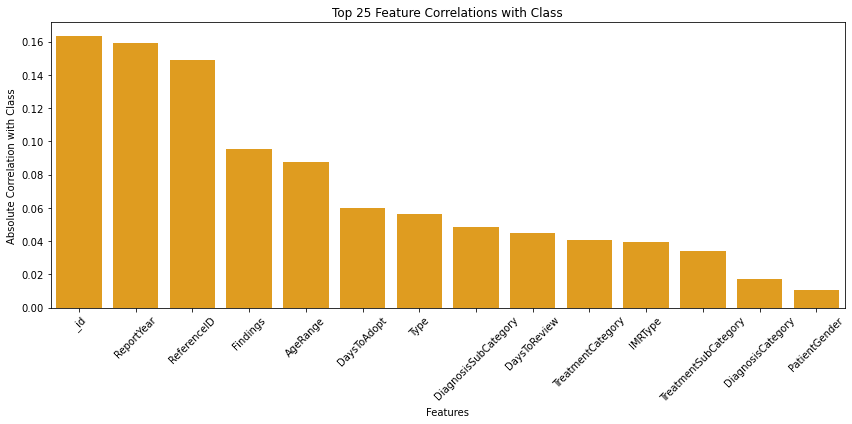

In [84]:
# Ensure all data is numeric (optional: use encoding if needed)
healthDataclean = healthDataclean.select_dtypes(include=['number'])

# Calculate correlation with 'Class'
correlation = healthDataclean.corr()['Determination'].drop('Determination')

# Get top 25 features by absolute correlation
sorted_c = correlation.abs().sort_values(ascending=False)[:25]

# Print top 5
print(sorted_c[:5])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_c.index, y=sorted_c.values, color="orange")
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Class')
plt.xticks(rotation=45)
plt.title('Top 25 Feature Correlations with Class')
plt.tight_layout()
plt.show()

In [85]:
# K Nearest Node Machine Learning Analysis

# Class 0 = Overturned Decision of Health Plan
# Class 1 = Upheld Decision of Health Plan

# Import KNN
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

# Predict and evaluate
Y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(Y_test, Y_pred_knn))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred_knn))

# F1-scores are low (0.52 and 0.47). Model isn't reliable.

# 2138 cases were correctly predicted as Overturned (class 0)
# 1804 were Overturned but predicted as Upheld (false negatives)
# 2083 were Upheld but predicted as Overturned (false positives)
# 1727 were correctly predicted as Upheld (class 1)

KNN Accuracy: 0.5792211087149562

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.58      0.59      4019
           1       0.57      0.58      0.57      3864

    accuracy                           0.58      7883
   macro avg       0.58      0.58      0.58      7883
weighted avg       0.58      0.58      0.58      7883


Confusion Matrix:
 [[2340 1679]
 [1638 2226]]


In [86]:
# Naive Bayes Machine Learning Analysis

# Class 0 = Overturned Decision of Health Plan
# Class 1 = Upheld Decision of Health Plan

# Import Naive Bayes Gaussian
from sklearn.naive_bayes import GaussianNB

# 8. Create and train the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, Y_train)

# 9. Predict and evaluate
Y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(Y_test, Y_pred_nb))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred_nb))

# Accuracy: 50.4% — slightly better than KNN but still bad.
# Determination 0 recall: 78%, Determination 1 recall: 22%. Very biased towards Determination 0.

# 3067 cases were correctly predicted as Overturned (class 0)
# 875 were Overturned but predicted as Upheld (false negatives)
# 2971 were Upheld but predicted as Overturned (false positives)
# 839 were correctly predicted as Upheld (class 1)

Naive Bayes Accuracy: 0.5774451351008499

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.60      0.59      4019
           1       0.57      0.56      0.56      3864

    accuracy                           0.58      7883
   macro avg       0.58      0.58      0.58      7883
weighted avg       0.58      0.58      0.58      7883


Confusion Matrix:
 [[2394 1625]
 [1706 2158]]


### ML Analysis -- Sebastian Sobolewski 

## Random Forest:

I selected Random Forest as the first model I wanted to experiment on as it gives solid insight on feature significance
and uses multiple trees to formulate a single output. The Random Forest implementation below saw good scores on metrics like
recall and f1-score despite a considerable class imbalance. Both recall and f1-score ranged from 90-97% across both classes. Moving
forward, we can take the insights from Random Forest to expand our machine learning analyses further as we have a foundational understanding
as to how we can improve feature selection and account for class imbalances.

In [34]:
### Random Forest ###

# On top of the already cleaned data set, some columns needed
# to be encoded to continue with the Random Forest model.
# Below are the adjustments taken to create a copy of the cleaned data
# with an encoded data set which we will use for Random Forest.

healthDatacleanEncoded = healthDataclean.copy()

from sklearn.preprocessing import LabelEncoder

encodeList = ["Determination", "Type", "AgeRange", "PatientGender", "IMRType", 'DiagnosisCategory', 'DiagnosisSubCategory', 'TreatmentCategory', 'TreatmentSubCategory']

for col in encodeList:
    label_encoder = LabelEncoder()
    healthDatacleanEncoded[col] = label_encoder.fit_transform(healthDatacleanEncoded[col])

col_data = healthDatacleanEncoded.pop('IMRType')
healthDatacleanEncoded['IMRType'] = col_data

healthDatacleanEncoded = healthDatacleanEncoded.drop(columns = ['ReferenceID', 'ReportYear', 'Findings', 'columnOverturned', 'columnUpheld', 'Delay'])

healthDatacleanEncoded

,_id,DiagnosisCategory,DiagnosisSubCategory,TreatmentCategory,TreatmentSubCategory,Determination,Type,AgeRange,PatientGender,DaysToReview,DaysToAdopt,IMRType
0,1,0,39,2,31,0,1,0,0,11.0,45,1
1,2,9,284,24,376,1,1,5,0,20.0,80,1
2,3,26,335,24,49,0,1,6,1,13.0,56,1
3,4,7,111,24,117,0,1,5,0,18.0,54,1
4,5,2,291,0,127,0,1,4,0,14.0,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39408,39443,16,291,13,158,1,1,4,0,18.0,44,1
39409,39444,19,291,8,219,1,1,5,0,21.0,44,1
39410,39445,14,240,24,28,1,1,5,1,0.0,15,0
39411,39446,3,291,3,88,1,0,5,0,7.0,14,0


In [35]:
# Create predictors

X = healthDatacleanEncoded.drop(columns=['IMRType'])
X

,_id,DiagnosisCategory,DiagnosisSubCategory,TreatmentCategory,TreatmentSubCategory,Determination,Type,AgeRange,PatientGender,DaysToReview,DaysToAdopt
0,1,0,39,2,31,0,1,0,0,11.0,45
1,2,9,284,24,376,1,1,5,0,20.0,80
2,3,26,335,24,49,0,1,6,1,13.0,56
3,4,7,111,24,117,0,1,5,0,18.0,54
4,5,2,291,0,127,0,1,4,0,14.0,66
...,...,...,...,...,...,...,...,...,...,...,...
39408,39443,16,291,13,158,1,1,4,0,18.0,44
39409,39444,19,291,8,219,1,1,5,0,21.0,44
39410,39445,14,240,24,28,1,1,5,1,0.0,15
39411,39446,3,291,3,88,1,0,5,0,7.0,14


In [36]:
# Create target

y = healthDatacleanEncoded['IMRType']
y

0        1
1        1
2        1
3        1
4        1
        ..
39408    1
39409    1
39410    0
39411    0
39412    0
Name: IMRType, Length: 39413, dtype: int64

In [37]:
# Split data with 20% being test data.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [38]:
rf = RandomForestClassifier(class_weight='balanced') # Create the model

In [39]:
rf.fit(X_train, y_train) # Fitting the model

RandomForestClassifier(class_weight='balanced')

In [40]:
y_pred = rf.predict(X_test)

In [41]:
rf.score(X_test, y_test) # Obtain accuracy score

0.9582646200685019

In [42]:
# Display additional statistics including recall and f1

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2272
           1       0.97      0.98      0.97      5611

    accuracy                           0.96      7883
   macro avg       0.95      0.95      0.95      7883
weighted avg       0.96      0.96      0.96      7883



In [43]:
# Investigate feature performance

features = pd.DataFrame(rf.feature_importances_, index = X.columns)
features.head(15)

,0
_id,0.088489
DiagnosisCategory,0.022261
DiagnosisSubCategory,0.025172
TreatmentCategory,0.025795
TreatmentSubCategory,0.026730
Determination,0.005639
Type,0.008978
AgeRange,0.013462
PatientGender,0.005320
DaysToReview,0.434181


In [44]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[2080  192]
 [ 137 5474]]


## Logistic Regression:

As it can be seen below, the sigmoid function does not look ideal. This is due to a class imbalance with a lot
of overlap between expedited and standard IMR Types. Nevertheless, I proceeded with model fitting
and achieved decent results. The model obtains accuracy of around 88% with recall and f1-scores hovering around the 80-90%
marks. Between the 2 models of Logistic Regression and Random Forest, it definitely is not the better performer with the latter achieving
higher scores in most metrics.

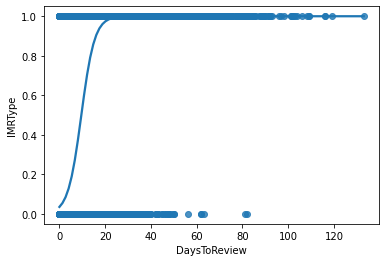

In [45]:
### Logistic Regression ###

# Using the same data set from the Random Forest which has already been encoded, 
# we can create a visualization including the sigmoid function for our logistic
# regression.

sns.regplot(x='DaysToReview', y='IMRType', data=healthDatacleanEncoded, logistic=True, ci=None)
plt.show()

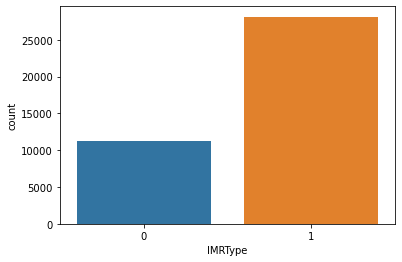

In [46]:
# There is a class imbalance to be observed.

sns.countplot(x='IMRType', data=healthDatacleanEncoded)
plt.show()

In [47]:
# Ensure we are working with DaysToReview

X = healthDatacleanEncoded[['DaysToReview']]
X

,DaysToReview
0,11.0
1,20.0
2,13.0
3,18.0
4,14.0
...,...
39408,18.0
39409,21.0
39410,0.0
39411,7.0


In [48]:
# Ensure we are capturing IMRType

y = healthDatacleanEncoded['IMRType']
y

0        1
1        1
2        1
3        1
4        1
        ..
39408    1
39409    1
39410    0
39411    0
39412    0
Name: IMRType, Length: 39413, dtype: int64

In [49]:
# Split the data into 20% test just like in Random Forest

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 11)

In [50]:
# Ensure that we are giving a column for training data

X_train.shape

(31530, 1)

In [51]:
# Same for the testing data

X_test.shape

(7883, 1)

In [52]:
# Create the model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')

In [53]:
model.fit(X_train, y_train) # Fit the model

LogisticRegression(class_weight='balanced')

In [54]:
y_pred = model.predict(X_test)

In [55]:
model.score(X_test, y_test) # Obtain accuracy

0.8826588862108334

In [56]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[2049  223]
 [ 702 4909]]


In [57]:
# Classification report which includes such measures like recall and f1 score.

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.82      2272
           1       0.96      0.87      0.91      5611

    accuracy                           0.88      7883
   macro avg       0.85      0.89      0.86      7883
weighted avg       0.90      0.88      0.89      7883



## Reflection:

### What is the most challenging part of the project that you’ve encountered so far?
- Understanding what the dataset is about. The data dictionary that was provided on the website was out of date and didn’t really help when we were trying to understand what the columns mean.  
- When looking at the null values, we struggled with knowing what to do with the values because we couldn’t get rid of the rows since we needed the data. It took us some time to figure out what method to use to clean the null values. Once we figured out that we can do the mode imputation, it helped us clean up the null values. 
- A lot of the ML models tested (K Nearest Node, Naive Bayes) have low accuracy (50%)
      Naive Bayes has a Determination overturned recall: 78%, Determination upheld recall: 22%. Very biased towards Determination = recall. As mentioned above, the machine learning models we tested perform at varying levels of accuracy. The other important thing to note is that when they do perform well it is largely due to class imbalance. This being said, we are finding it challenging to pick out good features while also maintaining balance between target classes.

### What are your initial insights?
- Our initial insights show that there are certainly some correlations between features and some are much better in terms of significance than others. For example, the days it takes to review and adopt have shown correlation and are the stronger performers when it comes to significance in our machine learning models. As we continue to build upon our data analysis and machine learning models, we are expecting to unravel these sorts of relationships further.

### Are there any concrete results you can show at this point? If not, why not?
- There are issues with the health care decisions for the age group of 51-64. With many of the visualizations that were created, we are able to notice that older adults are facing the most struggles with decisions being made.
- Even though the most common diagnoses is mental disorder, the delays are occurring for dental problems 

### Going forward, what are the current biggest problems you’re facing?
- Our expectations of the data vs how it actually is turned out to be different than what we expected. There isn’t really a big problem we are necessarily facing, rather we will have to really use trial and error a couple more times to see what will be the best way to proceed with such things like the machine learning models, in particular.

### Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
- Yes, we are on track with the project. We have cleaned the data, successfully implemented 4 different machine learning models, ran descriptive statistics, and created many different valuable visualizations to help understand the data better.

### Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?
- Yes, it is worth proceeding with the project. We were able to see many trends that we were not aware of.

## Next Steps: 

### Concrete plans and goals for the next month?
- Work on the final presentation 
- Prepare for the in class presentation 
- Make sure everything is ready to submit our final project 
- We can look into the gender aspect of the data. Since there are more females than male, does this also mean that more females face delays than males when it comes to decisions? 
    - We want to try to identify another hypothesis that ties in with the trends that we are noticing. 
    - Confirm that older adults are facing issues with having health care decisions being made (look into more models and ml analysis?)
